# Correlation study
In this notebook, we study the offset and the correlation between the values given by each tool and the values reported by the external power meter.

## Import necessary libraries

In [1]:
%load_ext autoreload
%autoreload 2

from visualize import *
import matplotlib.pyplot as plt
import seaborn as sns

## Load experiment results

In [2]:
experiments_path = [
    '3-solutions-compare-gemini-1.lyon.grid5000.fr-2022-03-31-17_35_17',
    '3-solutions-compare-gemini-1.lyon.grid5000.fr-2022-03-31-18_05_29',
    '3-solutions-compare-gemini-1.lyon.grid5000.fr-2022-03-31-18_36_17',
    '3-solutions-compare-gemini-1.lyon.grid5000.fr-2022-03-31-19_07_02',
    '3-solutions-compare-gemini-1.lyon.grid5000.fr-2022-03-31-19_38_14',
    '3-solutions-compare-gemini-1.lyon.grid5000.fr-2022-03-31-20_09_18',
    '3-solutions-compare-gemini-1.lyon.grid5000.fr-2022-03-31-20_39_40',
    '3-solutions-compare-gemini-1.lyon.grid5000.fr-2022-03-31-21_10_48',
    '3-solutions-compare-gemini-1.lyon.grid5000.fr-2022-03-31-21_41_51',
    '3-solutions-compare-gemini-1.lyon.grid5000.fr-2022-03-31-22_12_51'
]

experiments = []

for experiment_path in experiments_path:
    parsed_experiment = parse_experiment("../results/%s" % experiment_path)
    experiments.append(parsed_experiment)

# Additional processing is required for Scaphandre dataframes
# Scaphandre by component result dataframes will be joined into a single dataframe
process_scaphandre_dataframes(experiments)

experiments_path_perf = [
    'perf-power-profile-gemini-1.lyon.grid5000.fr-2023-02-08-21_15_51',
    'perf-power-profile-gemini-1.lyon.grid5000.fr-2023-02-08-21_25_38',
    'perf-power-profile-gemini-1.lyon.grid5000.fr-2023-02-08-21_35_05',
    'perf-power-profile-gemini-1.lyon.grid5000.fr-2023-02-08-21_44_41',
    'perf-power-profile-gemini-1.lyon.grid5000.fr-2023-02-08-21_54_24',
    'perf-power-profile-gemini-1.lyon.grid5000.fr-2023-02-08-22_04_02',
    'perf-power-profile-gemini-1.lyon.grid5000.fr-2023-02-08-22_13_35',
    'perf-power-profile-gemini-1.lyon.grid5000.fr-2023-02-08-22_23_19',
    'perf-power-profile-gemini-1.lyon.grid5000.fr-2023-02-08-22_33_05',
    'perf-power-profile-gemini-1.lyon.grid5000.fr-2023-02-08-22_42_49'
]

experiments_perf = []
for experiment_path in experiments_path_perf:
    experiments_perf.append(parse_experiment("../results/%s" % experiment_path))

## PowerAPI study

In [3]:
result_df = get_correlation_by_benchmark(experiments, 'PowerAPI', 'powerapi', benchmark_delay_time=5)
show_correlation_statistics(result_df)

---------- Global statistics ----------
Pearson correlation coefficient: 0.9565968334570749
Regression: (1.171609363357318, 974.483808105801)
    ---------- Benchmark EP NAS Benchmark statistics ----------
    Pearson correlation coefficient: 0.9804479544723183
    Regression: (1.1937769635370439, 969.1494456253336)
    ---------- Benchmark LU NAS Benchmark statistics ----------
    Pearson correlation coefficient: 0.9717126425258974
    Regression: (1.1701716376476416, 973.829253918239)
    ---------- Benchmark MG NAS Benchmark statistics ----------
    Pearson correlation coefficient: 0.9141240697189834
    Regression: (1.1229564986003682, 986.1697823634125)


## Scaphandre study

In [4]:
result_df = get_correlation_by_benchmark(experiments, 'Scaphandre', 'scaphandre', benchmark_delay_time=5)
show_correlation_statistics(result_df)

---------- Global statistics ----------
Pearson correlation coefficient: 0.9303984952284537
Regression: (1.1389235948775198, 982.0126774351711)
    ---------- Benchmark EP NAS Benchmark statistics ----------
    Pearson correlation coefficient: 0.8989448101888868
    Regression: (1.0749284549723659, 992.6203376598194)
    ---------- Benchmark LU NAS Benchmark statistics ----------
    Pearson correlation coefficient: 0.8527694399511061
    Regression: (1.0369454324619625, 1002.3805945485149)
    ---------- Benchmark MG NAS Benchmark statistics ----------
    Pearson correlation coefficient: 0.9029204219252878
    Regression: (1.115002834214097, 988.2843063465507)


## Energy Scope study

In [5]:
result_df = get_correlation_by_benchmark(experiments, 'EnergyScope', 'energyscope', benchmark_delay_time=5)
show_correlation_statistics(result_df)

---------- Global statistics ----------
Pearson correlation coefficient: 0.9726308331001081
Regression: (1.1791100470621498, 972.6944331013971)
    ---------- Benchmark EP NAS Benchmark statistics ----------
    Pearson correlation coefficient: 0.9769597170928885
    Regression: (1.1656140457081976, 974.4471836256696)
    ---------- Benchmark LU NAS Benchmark statistics ----------
    Pearson correlation coefficient: 0.9830042266870361
    Regression: (1.169359128796086, 973.9772918408477)
    ---------- Benchmark MG NAS Benchmark statistics ----------
    Pearson correlation coefficient: 0.9456078585466183
    Regression: (1.1474975827104763, 980.4302419218008)


## Perf study

In [6]:
result_df = get_correlation_by_benchmark(experiments_perf, 'Perf', 'perf', benchmark_delay_time=5)
show_correlation_statistics(result_df)

---------- Global statistics ----------
Pearson correlation coefficient: 0.930262162701146
Regression: (1.176115221256585, 973.1231270503442)
    ---------- Benchmark EP NAS Benchmark statistics ----------
    Pearson correlation coefficient: 0.9251571931789871
    Regression: (1.2790311499543738, 951.8492222435309)
    ---------- Benchmark LU NAS Benchmark statistics ----------
    Pearson correlation coefficient: 0.7383611469853766
    Regression: (1.8040371070147878, 830.949797382473)
    ---------- Benchmark MG NAS Benchmark statistics ----------
    Pearson correlation coefficient: 0.8691668158189128
    Regression: (1.0776824723553566, 996.5587394907268)


## All solutions study

In [7]:
result_df_powerapi = get_correlation_by_benchmark(experiments, 'PowerAPI', 'powerapi', benchmark_delay_time=5)
result_df_scaphandre = get_correlation_by_benchmark(experiments, 'Scaphandre', 'scaphandre', benchmark_delay_time=5)
result_df_energyscope = get_correlation_by_benchmark(experiments, 'EnergyScope', 'energyscope', benchmark_delay_time=5)
result_df_perf = get_correlation_by_benchmark(experiments_perf, 'Perf', 'perf', benchmark_delay_time=5)

result_df_all_solutions = pd.concat([result_df_powerapi, result_df_scaphandre, result_df_energyscope, result_df_perf], ignore_index=True)

show_correlation_statistics(result_df_all_solutions)

---------- Global statistics ----------
Pearson correlation coefficient: 0.9570993121902505
Regression: (1.1742816340919653, 973.7408822885814)
    ---------- Benchmark EP NAS Benchmark statistics ----------
    Pearson correlation coefficient: 0.9719325721996706
    Regression: (1.1816066817595219, 971.2599455894972)
    ---------- Benchmark LU NAS Benchmark statistics ----------
    Pearson correlation coefficient: 0.9597029850094034
    Regression: (1.1673017041188465, 973.9278565250225)
    ---------- Benchmark MG NAS Benchmark statistics ----------
    Pearson correlation coefficient: 0.9169003584388986
    Regression: (1.1231433812716125, 986.1029239469335)


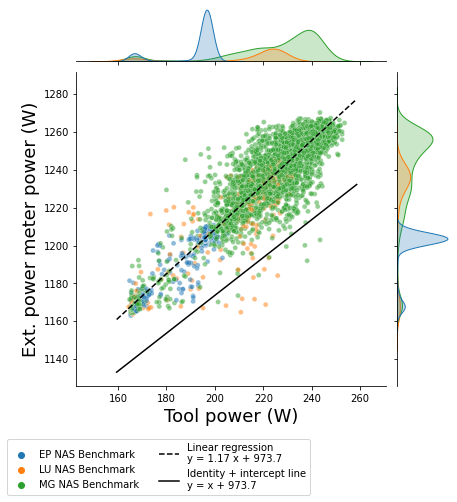

In [8]:
plt.rcParams.update({'font.size': 14})

# Plotting all points by benchmark and regression
grid = sns.jointplot(
    data=result_df_all_solutions, 
    x="tool",
    y='wattmeter',
    hue='benchmark',
    alpha=.5,
    s=25
    )
#grid.plot_joint(sns.scatterplot, s=25, alpha=.6)
grid.set_axis_labels('Tool power (W)', 'Ext. power meter power (W)', fontsize=18)

# Calculating global regression
coef, intercept = calculate_linear_regression(result_df_all_solutions)

# Creating points for linear regression and ploting the regression line
the_x = result_df_all_solutions["tool"].sort_values().values
the_x = np.concatenate([np.array([the_x[0]-5]),the_x, np.array([the_x[-1]+5])])
the_z = coef*the_x + intercept

grid.fig.axes[0].plot(
    the_x,
    the_z, 
    linestyle='--', 
    color='black',
    label=f"Linear regression\ny = {str(round(coef, 2))} x + {str(round(intercept, 1))}",
)

grid.fig.axes[0].plot(
    the_x,
    the_x + round(intercept, 1),
    'k-', 
    label=f"Identity + intercept line\ny = x + {round(intercept, 1)}")

grid.fig.axes[0].legend(
    bbox_to_anchor=(-0.24,-0.15),
    loc='upper left',
    ncol=2
)

grid.savefig('../figures/alltools_correlation_2.pdf')
grid.savefig('../figures/alltools_correlation_2.png', dpi=100)